In [68]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
import statsmodels.api as sm

In [69]:
ticker = '000001.SS'  # 上证指数的代码
end_date = datetime.now().strftime('%Y-%m-%d')
data = yf.download(ticker, start='2023-01-01', end=end_date)

data.reset_index(inplace=True)
print(data)

[*********************100%***********************]  1 of 1 completed

          Date         Open         High          Low        Close  \
0   2023-01-03  3087.510010  3119.860107  3073.050049  3116.510010   
1   2023-01-04  3117.570068  3129.090088  3109.449951  3123.520020   
2   2023-01-05  3132.760010  3159.429932  3130.229980  3155.219971   
3   2023-01-06  3155.070068  3170.739990  3151.840088  3157.639893   
4   2023-01-09  3169.370117  3183.580078  3165.429932  3176.080078   
..         ...          ...          ...          ...          ...   
405 2024-09-03  2809.173096  2814.903076  2794.910889  2802.979004   
406 2024-09-04  2786.504883  2800.606934  2781.935059  2784.278076   
407 2024-09-05  2785.263916  2796.019043  2777.470947  2788.313965   
408 2024-09-06  2791.764893  2804.093018  2765.638916  2765.806885   
409 2024-09-09  2754.724121  2756.555908  2726.967041  2736.488037   

       Adj Close  Volume  
0    3116.510010  281400  
1    3123.520020  273300  
2    3155.219971  257000  
3    3157.639893  257400  
4    3176.080078  258100

In [70]:
data['Log Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
data = data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume,Log Return
1,2023-01-04,3117.570068,3129.090088,3109.449951,3123.520020,3123.520020,273300,0.002247
2,2023-01-05,3132.760010,3159.429932,3130.229980,3155.219971,3155.219971,257000,0.010098
3,2023-01-06,3155.070068,3170.739990,3151.840088,3157.639893,3157.639893,257400,0.000767
4,2023-01-09,3169.370117,3183.580078,3165.429932,3176.080078,3176.080078,258100,0.005823
5,2023-01-10,3178.020020,3178.159912,3165.139893,3169.510010,3169.510010,233000,-0.002071
...,...,...,...,...,...,...,...,...
405,2024-09-03,2809.173096,2814.903076,2794.910889,2802.979004,2802.979004,275700,-0.002870
406,2024-09-04,2786.504883,2800.606934,2781.935059,2784.278076,2784.278076,257500,-0.006694
407,2024-09-05,2785.263916,2796.019043,2777.470947,2788.313965,2788.313965,242000,0.001448
408,2024-09-06,2791.764893,2804.093018,2765.638916,2765.806885,2765.806885,253600,-0.008105


In [71]:
STOCKS = []
def get_stock_data(tickers):
    end_date = datetime.now().strftime('%Y-%m-%d')
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        data = yf.download(ticker, start='2023-01-01', end=end_date)

        data.reset_index(inplace=True)
        STOCKS.append(data)

tickers = ['601127.SS', '002594.SZ', '002432.SZ']
get_stock_data(tickers)

for i, stock in enumerate(STOCKS):
    stock['Log Return'] = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))
    stock = stock.dropna()
    STOCKS[i] = stock
    
print(STOCKS)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for 601127.SS...
Fetching data for 002594.SZ...
Fetching data for 002432.SZ...
[          Date       Open       High        Low      Close  Adj Close  \
1   2023-01-04  41.000000  41.330002  40.290001  40.740002  40.740002   
2   2023-01-05  41.680000  42.000000  40.880001  41.099998  41.099998   
3   2023-01-06  40.880001  42.150002  40.709999  41.209999  41.209999   
4   2023-01-09  40.980000  42.410000  40.820000  41.450001  41.450001   
5   2023-01-10  41.700001  45.200001  40.599998  44.000000  44.000000   
..         ...        ...        ...        ...        ...        ...   
405 2024-09-03  74.080002  75.250000  73.610001  74.849998  74.849998   
406 2024-09-04  74.370003  75.250000  73.680000  74.550003  74.550003   
407 2024-09-05  74.989998  77.500000  74.650002  76.820000  76.820000   
408 2024-09-06  76.820000  78.500000  75.570000  75.680000  75.680000   
409 2024-09-09  74.959999  76.500000  74.480003  76.180000  76.180000   

       Volume  Log Return  
1

In [73]:
X = data['Log Return']

# Y
tmp = pd.DataFrame({
    'stock_A': STOCKS[0]['Log Return'],
    'stock_B': STOCKS[1]['Log Return'],
    'stock_C': STOCKS[2]['Log Return']
})
weights = np.array([1/3, 1/3, 1/3])
portfolio_log_return = tmp.dot(weights)
y = portfolio_log_return

X, y



(1      0.002247
 2      0.010098
 3      0.000767
 4      0.005823
 5     -0.002071
          ...   
 405   -0.002870
 406   -0.006694
 407    0.001448
 408   -0.008105
 409   -0.010657
 Name: Log Return, Length: 409, dtype: float64,
 1     -0.018797
 2      0.011135
 3      0.007943
 4     -0.002397
 5      0.025046
          ...   
 405    0.014083
 406    0.010757
 407    0.020696
 408   -0.010601
 409   -0.004050
 Length: 409, dtype: float64)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     138.9
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           8.81e-28
Time:                        17:37:58   Log-Likelihood:                 1120.7
No. Observations:                 409   AIC:                            -2237.
Df Residuals:                     407   BIC:                            -2229.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.938      0.3

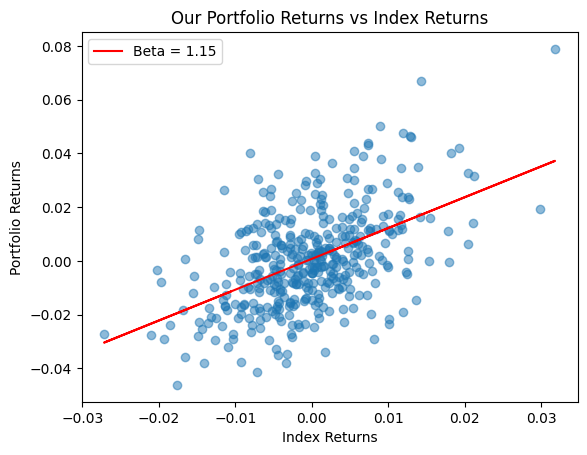

In [77]:
import matplotlib.pyplot as plt

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

beta = model.params['Log Return']
alpha = model.params['const']

print(f"Beta: {beta}")
print(f"Alpha: {alpha}")

# 可视化投资组合和沪深300指数的收益率关系
plt.scatter(data['Log Return'], portfolio_log_return, alpha=0.5)
plt.plot(data['Log Return'], model.predict(X), color='red', label=f'Beta = {beta:.2f}')
plt.title('Our Portfolio Returns vs Index Returns')
plt.xlabel('Index Returns')
plt.ylabel('Portfolio Returns')
plt.legend()
plt.show()